In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
fd = pd.read_csv('csvs/afterone.csv')

In [3]:
fd.shape

(4836, 45)

In [4]:
#cluster analysis incoming 


In [5]:
from kmodes.kprototypes import KPrototypes


In [6]:
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

In [7]:
#removing features not used in clustering for now
df = fd[['exptotal', 'coalmetl', 'opercont', 'commod', 'district', 'ywtotal', 'age', 'sex', 'canvass', 'injtype', 'deginj', 'accinj', 'subunit', 'daystotl']]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4836 entries, 0 to 4835
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   exptotal  4836 non-null   float64
 1   coalmetl  4836 non-null   object 
 2   opercont  4836 non-null   object 
 3   commod    4836 non-null   object 
 4   district  4836 non-null   object 
 5   ywtotal   4836 non-null   int64  
 6   age       4836 non-null   int64  
 7   sex       4836 non-null   object 
 8   canvass   4836 non-null   object 
 9   injtype   4836 non-null   object 
 10  deginj    4836 non-null   object 
 11  accinj    4836 non-null   object 
 12  subunit   4836 non-null   object 
 13  daystotl  4836 non-null   int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 340.1+ KB


In [9]:
#plt.style.use('seaborn-darkgrid')
#palette = plt.get_cmap('Set1')
#num = 0
#for column in df[['exptotal', 'ywtotal']]:
#    num+=1
#    plt.plot(range(0, 4836), df[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)
#plt.legend(loc=2, ncol=2)
#plt.show()


In [10]:
df.select_dtypes('object').nunique()


coalmetl     2
opercont     2
commod       7
district    15
sex          2
canvass      6
injtype      4
deginj      10
accinj      17
subunit      9
dtype: int64

In [11]:
df.describe()


,exptotal,ywtotal,age,daystotl
count,4836.000000,4836.000000,4836.000000,4836.000000
mean,10.043332,10.955335,41.118900,115.256824
std,10.210454,9.429281,12.836339,634.057121
min,0.020000,5.000000,18.000000,0.000000
25%,2.000000,5.000000,30.000000,0.000000
50%,7.000000,5.000000,40.000000,10.000000
75%,14.960000,15.000000,52.000000,59.000000
max,56.000000,55.000000,84.000000,6000.000000


In [12]:
from sklearn import preprocessing
#df_scale= df.copy()
scaler = preprocessing.MinMaxScaler()
df[['exptotal','age', 'ywtotal', 'daystotl']] = scaler.fit_transform(df[['exptotal','age', 'ywtotal', 'daystotl']])
df

C:\Users\dead_phoenix\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\dead_phoenix\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,exptotal,coalmetl,opercont,commod,district,ywtotal,age,sex,canvass,injtype,deginj,accinj,subunit,daystotl
0,0.205431,Metal/Nonmetal/Stone/S&G,Operator,Stone operator,"MSE-Southeast-Birmingham, AL",0.2,0.363636,Male,Stone,"NFDL (Nonfatal, days lost)",Days of restricted activity only,Handling material,Mill or preparation plant:Mill prep plant or b...,0.000333
1,0.017149,Metal/Nonmetal/Stone/S&G,Contractor,Noncoal contractor,"MSE-Southeast-Birmingham, AL",0.0,0.212121,Male,Stone,"NFDL (Nonfatal, days lost)",Days of restricted activity only,Stepping/kneeling on object,Surface: Strip or open pit mines including as...,0.005333
2,0.001429,Metal/Nonmetal/Stone/S&G,Contractor,Noncoal contractor,"MSE-Southeast-Birmingham, AL",0.0,0.000000,Male,Stone,"NFDL (Nonfatal, days lost)",Days of restricted activity only,Slip or fall of person,Surface: Strip or open pit mines including as...,0.001167
3,0.267596,Metal/Nonmetal/Stone/S&G,Operator,Stone operator,"MSE-Southeast-Birmingham, AL",0.2,0.621212,Male,Stone,"NFDL (Nonfatal, days lost)",Days away AND restricted activity,Handling material,Surface: Strip or open pit mines including as...,0.004000
4,0.401929,Metal/Nonmetal/Stone/S&G,Operator,Stone operator,"MSE-Southeast-Birmingham, AL",0.4,0.681818,Male,Stone,"NFDL (Nonfatal, days lost)",Days away from work only,Slip or fall of person,Surface: Strip or open pit mines including as...,0.043000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4831,0.732047,Metal/Nonmetal/Stone/S&G,Operator,Stone operator,"MSE-Southeast-Birmingham, AL",0.8,0.681818,Male,Stone,"NFDL (Nonfatal, days lost)",Days away from work only,Handling material,Mill or preparation plant:Mill prep plant or b...,0.000833
4832,0.068239,Metal/Nonmetal/Stone/S&G,Operator,Stone operator,"MSE-Southeast-Birmingham, AL",0.0,0.484848,Male,Stone,"NFDL (Nonfatal, days lost)",Days away from work only,Handling material,Surface: Strip or open pit mines including as...,0.001000
4833,0.055913,Metal/Nonmetal/Stone/S&G,Operator,Stone operator,"MSE-Southeast-Birmingham, AL",0.0,0.106061,Male,Stone,"NFDL (Nonfatal, days lost)",Days away from work only,Slip or fall of person,Surface: Strip or open pit mines including as...,0.002667
4834,0.088960,Metal/Nonmetal/Stone/S&G,Operator,Stone operator,"MSE-Southeast-Birmingham, AL",0.0,0.348485,Male,Stone,"NFDL (Nonfatal, days lost)",Days away from work only,Handling material,Surface: Strip or open pit mines including as...,0.028500


In [13]:
df.isna().sum()


exptotal    0
coalmetl    0
opercont    0
commod      0
district    0
ywtotal     0
age         0
sex         0
canvass     0
injtype     0
deginj      0
accinj      0
subunit     0
daystotl    0
dtype: int64

In [14]:
catColumnsPos = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]

In [15]:
dfMatrix = df.to_numpy()

In [ ]:
cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

In [ ]:
df_cost = pd.DataFrame({'Cluster':range(1, 10), 'Cost':cost})


In [16]:
from plotnine import *
import plotnine
from plotnine import ggplot, aes, geom_line, geom_point, geom_label, labs, xlab, theme_minimal, ylab


In [ ]:
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [ ]:
#looks like the elbow plot is bending at 2


In [17]:
kprototype = KPrototypes(n_jobs = -1, n_clusters = 2, init = 'Huang', random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)

array([1, 1, 1, ..., 1, 1, 1], dtype=uint16)

In [18]:
kprototype.cluster_centroids_

array([['0.25485052244364087', '0.1870203160270863',
        '0.3692198508789908', '0.020649454477050487', 'Coal', 'Operator',
        'Coal operator', 'C03-Morgantown, WV', 'Male', 'Bituminous Coal',
        'NFDL (Nonfatal, days lost)', 'Days away from work only',
        'Handling material',
        'Underground operations:All underground operations below surface of ground.Excavations beneath roof.Hoisting to surface.'],
       ['0.13521555195516466', '0.07983028720626568',
        '0.33933657726085786', '0.018376686248912002',
        'Metal/Nonmetal/Stone/S&G', 'Operator', 'Stone operator',
        'MRM-Rocky Mountain-Denver, CO', 'Male', 'Stone',
        'NFDL (Nonfatal, days lost)', 'Days of restricted activity only',
        'Handling material',
        'Surface:  Strip or open pit mines including associated shops and yards']],
      dtype='<U119')

In [19]:
kprototype.n_iter_


8

In [20]:
kprototype.cost_


2494.572756851917

In [21]:
df['Cluster Labels'] = kprototype.labels_


C:\Users\dead_phoenix\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [22]:
df['Segment'] = df['Cluster Labels'].map({0:'First', 1:'Second'})


C:\Users\dead_phoenix\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [23]:
df['Segment'] = df['Segment'].astype('category')


C:\Users\dead_phoenix\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [24]:
df['Segment'] = df['Segment'].cat.reorder_categories(['First','Second'])

C:\Users\dead_phoenix\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [25]:
df.head()

,exptotal,coalmetl,opercont,commod,district,ywtotal,age,sex,canvass,injtype,deginj,accinj,subunit,daystotl,Cluster Labels,Segment
0,0.205431,Metal/Nonmetal/Stone/S&G,Operator,Stone operator,"MSE-Southeast-Birmingham, AL",0.2,0.363636,Male,Stone,"NFDL (Nonfatal, days lost)",Days of restricted activity only,Handling material,Mill or preparation plant:Mill prep plant or b...,0.000333,1,Second
1,0.017149,Metal/Nonmetal/Stone/S&G,Contractor,Noncoal contractor,"MSE-Southeast-Birmingham, AL",0.0,0.212121,Male,Stone,"NFDL (Nonfatal, days lost)",Days of restricted activity only,Stepping/kneeling on object,Surface: Strip or open pit mines including as...,0.005333,1,Second
2,0.001429,Metal/Nonmetal/Stone/S&G,Contractor,Noncoal contractor,"MSE-Southeast-Birmingham, AL",0.0,0.000000,Male,Stone,"NFDL (Nonfatal, days lost)",Days of restricted activity only,Slip or fall of person,Surface: Strip or open pit mines including as...,0.001167,1,Second
3,0.267596,Metal/Nonmetal/Stone/S&G,Operator,Stone operator,"MSE-Southeast-Birmingham, AL",0.2,0.621212,Male,Stone,"NFDL (Nonfatal, days lost)",Days away AND restricted activity,Handling material,Surface: Strip or open pit mines including as...,0.004000,1,Second
4,0.401929,Metal/Nonmetal/Stone/S&G,Operator,Stone operator,"MSE-Southeast-Birmingham, AL",0.4,0.681818,Male,Stone,"NFDL (Nonfatal, days lost)",Days away from work only,Slip or fall of person,Surface: Strip or open pit mines including as...,0.043000,1,Second


In [26]:
df.rename(columns = {'Cluster Labels':'Total'}, inplace = True)


C:\Users\dead_phoenix\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [27]:
df.head()

,exptotal,coalmetl,opercont,commod,district,ywtotal,age,sex,canvass,injtype,deginj,accinj,subunit,daystotl,Total,Segment
0,0.205431,Metal/Nonmetal/Stone/S&G,Operator,Stone operator,"MSE-Southeast-Birmingham, AL",0.2,0.363636,Male,Stone,"NFDL (Nonfatal, days lost)",Days of restricted activity only,Handling material,Mill or preparation plant:Mill prep plant or b...,0.000333,1,Second
1,0.017149,Metal/Nonmetal/Stone/S&G,Contractor,Noncoal contractor,"MSE-Southeast-Birmingham, AL",0.0,0.212121,Male,Stone,"NFDL (Nonfatal, days lost)",Days of restricted activity only,Stepping/kneeling on object,Surface: Strip or open pit mines including as...,0.005333,1,Second
2,0.001429,Metal/Nonmetal/Stone/S&G,Contractor,Noncoal contractor,"MSE-Southeast-Birmingham, AL",0.0,0.000000,Male,Stone,"NFDL (Nonfatal, days lost)",Days of restricted activity only,Slip or fall of person,Surface: Strip or open pit mines including as...,0.001167,1,Second
3,0.267596,Metal/Nonmetal/Stone/S&G,Operator,Stone operator,"MSE-Southeast-Birmingham, AL",0.2,0.621212,Male,Stone,"NFDL (Nonfatal, days lost)",Days away AND restricted activity,Handling material,Surface: Strip or open pit mines including as...,0.004000,1,Second
4,0.401929,Metal/Nonmetal/Stone/S&G,Operator,Stone operator,"MSE-Southeast-Birmingham, AL",0.4,0.681818,Male,Stone,"NFDL (Nonfatal, days lost)",Days away from work only,Slip or fall of person,Surface: Strip or open pit mines including as...,0.043000,1,Second


In [52]:
filt_label0 = df.loc[df.Total == 0, ['exptotal', 'age'] ]
filt_label1 = df.loc[df.Total == 1, ['exptotal', 'age'] ]

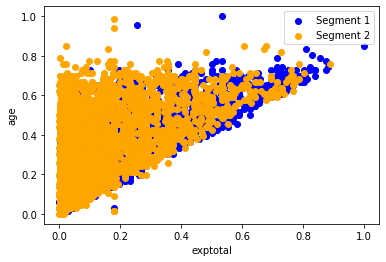

In [53]:
plt.scatter(filt_label0.iloc[:,0] , filt_label0.iloc[:,1] , color = 'blue')
plt.scatter(filt_label1.iloc[:,0] , filt_label1.iloc[:,1] , color = 'orange')
plt.xlabel("exptotal")
plt.ylabel("age")
plt.legend(["Segment 1" , "Segment 2"])
plt.show()

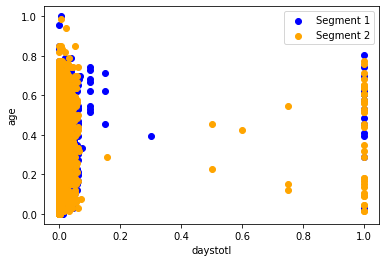

In [54]:
filt_label0 = df.loc[df.Total == 0, ['daystotl', 'age'] ]
filt_label1 = df.loc[df.Total == 1, ['daystotl', 'age'] ]
plt.scatter(filt_label0.iloc[:,0] , filt_label0.iloc[:,1] , color = 'blue')
plt.scatter(filt_label1.iloc[:,0] , filt_label1.iloc[:,1] , color = 'orange')
plt.xlabel("daystotl")
plt.ylabel("age")
plt.legend(["Segment 1" , "Segment 2"])
plt.show()

In [30]:
import seaborn as sns
#sns.set_theme(style="whitegrid")
#sns.swarmplot(x= "opercont", y= "commod", hue = "Segment", data = df, size = 1)

In [32]:
df['exptotalus'] = fd.exptotal
df['ywtotalus'] = fd['ywtotal']
df['ageus'] = fd['age']
df['daystotlus'] = fd['daystotl']

C:\Users\dead_phoenix\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\dead_phoenix\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\dead_phoenix\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [43]:
df.groupby('Segment').agg(
    {
        'Total':'count',
        'coalmetl': lambda x: x.value_counts().index[0],
        'commod': lambda x: x.value_counts().index[0],
        'sex': lambda x: x.value_counts().index[0],
        'canvass': lambda x: x.value_counts().index[0],
        'exptotalus': 'mean',
        'ageus': 'mean',
        'ywtotalus': 'mean',
        'accinj': lambda x: x.value_counts().index[0],
        'daystotlus': 'mean'
    }
).reset_index()

,Segment,Total,coalmetl,commod,sex,canvass,exptotalus,ageus,ywtotalus,accinj,daystotlus
0,First,1772,Coal,Coal operator,Male,Bituminous Coal,14.286532,42.368510,14.351016,Handling material,123.896727
1,Second,3064,Metal/Nonmetal/Stone/S&G,Stone operator,Male,Stone,7.589367,40.396214,8.991514,Handling material,110.260117


In [34]:
#sns.swarmplot(x= "exptotalus", y= "daystotl", hue = "Segment", data = df)

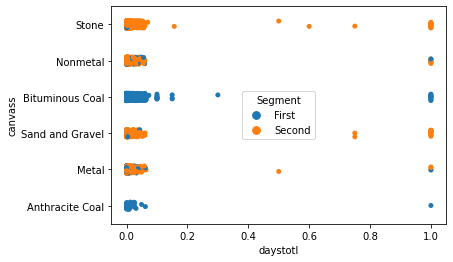

In [35]:
ax = sns.stripplot(x = "daystotl", y = "canvass", hue = "Segment", data = df)


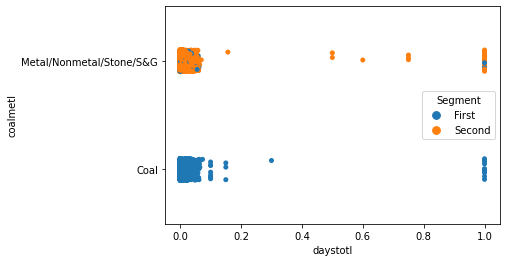

In [36]:
ax = sns.stripplot(x = "daystotl", y = "coalmetl", hue = "Segment", data = df)


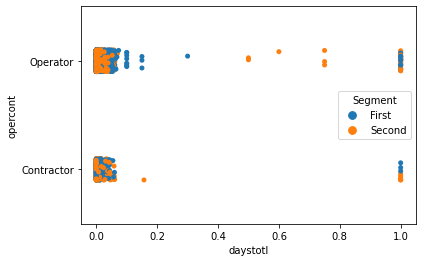

In [38]:
ax = sns.stripplot(x = "daystotl", y = "opercont", hue = "Segment", data = df)


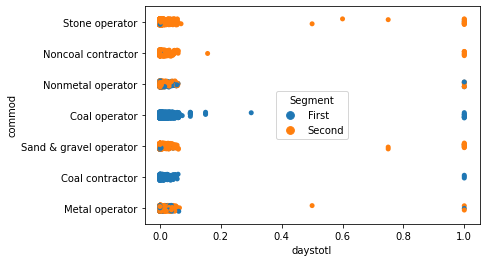

In [39]:
ax = sns.stripplot(x = "daystotl", y = "commod", hue = "Segment", data = df)


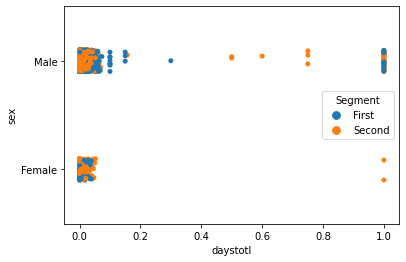

In [40]:
ax = sns.stripplot(x = "daystotl", y = "sex", hue = "Segment", data = df)


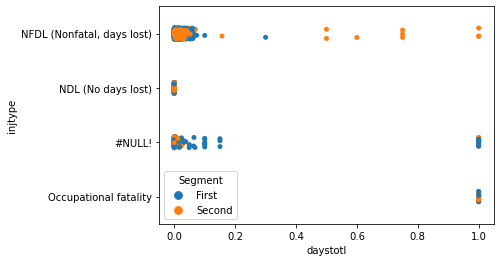

In [41]:
ax = sns.stripplot(x = "daystotl", y = "injtype", hue = "Segment", data = df)


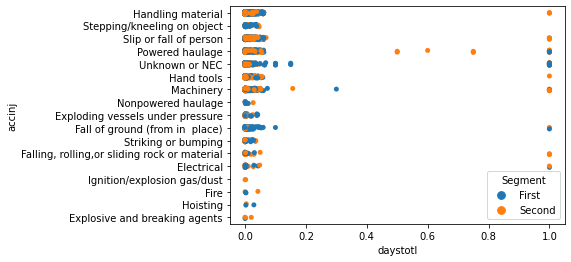

In [42]:
ax = sns.stripplot(x = "daystotl", y = "accinj", hue = "Segment", data = df)
